In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
csv_path = os.path.join("..","data","train.csv")
train_data = pd.read_csv(csv_path)

In [3]:
train_data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


## For now undersample the dataset in order to try an algorithm

In [4]:
train_data_0 = train_data.loc[train_data.target == 0]
train_data_1 = train_data.loc[train_data.target == 1]

In [5]:
# Create a randomly generated downsampled dataframe
train_data_0_downsampled = train_data_0.sample(n=len(train_data_1))

N = 5000 # x2 How many samples you want to try
train_data_undersampled = pd.concat([train_data_0_downsampled, train_data_1])

## Import SGDClassifier and create a model. After model fit:
- Use eli5 for Permutation Importance
- use predict_proba to get probability of guesses. (ROC Curve)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

In [7]:
X = train_data_undersampled.drop(columns=["ID_code", "target"])
y = train_data_undersampled["target"]

In [8]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [9]:
# Standard Scaler to X_train
X_scaler = StandardScaler().fit(X_train)
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

In [10]:
# SET model parameters and fit to training data
clf = SGDClassifier(loss="log", penalty="l2", max_iter=5)
clf.fit(X_train, y_train)

C:\Users\mtoriello0725\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
predictions = clf.predict(X_test)

In [12]:
print(clf.score(X_test, y_test))

0.7037067750228045


In [13]:
# classification report
from sklearn.metrics import classification_report, roc_curve, auc
print(classification_report(y_test.ravel(), predictions.ravel()))

              precision    recall  f1-score   support

           0       0.70      0.71      0.71      6022
           1       0.71      0.69      0.70      6037

   micro avg       0.70      0.70      0.70     12059
   macro avg       0.70      0.70      0.70     12059
weighted avg       0.70      0.70      0.70     12059



In [14]:
predictions_proba = clf.predict_proba(X_test)

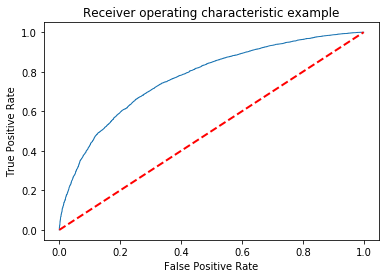

In [15]:
# Create ROC curve
fpr, tpr, thresholds = roc_curve(y_test.ravel(), predictions_proba[:,1])
roc_auc = auc(fpr, tpr)

# Create Plot
plt.plot(fpr, tpr, lw=1)
plt.plot([0,1], [0,1], linestyle="--", lw=2, color="r")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
# plt.legend(loc="lower right")
plt.show()

Using proba, can find the probability whether the guess is a 0 or a 1. Essentially find out how confident the model is
- ex: if the threshold is .8, true positive rate (tpr) will be low, but FPR will be lower (bottom-left of the graph)
- if the threshold is around .3, true positive rate 

## Learn more about roc curves here:
https://www.youtube.com/watch?v=OAl6eAyP-yo

In [16]:
# Area under the curve
roc_auc

0.7709167484669293

C:\Users\mtoriello0725\Anaconda3\envs\PythonData\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


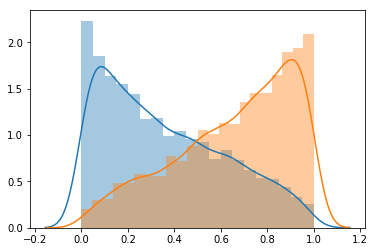

In [17]:
# Distribution plot to better understand ROC Curve
sns.distplot(fpr)
sns.distplot(tpr)
plt.show()

## Permutation Importance

In [21]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.feature_selection import SelectFromModel

In [28]:
perm = PermutationImportance(clf).fit(X_train, y_train)
eli5.show_weights(perm)

Weight,Feature
0.0074 ± 0.0009,x148
0.0066 ± 0.0020,x110
0.0061 ± 0.0030,x190
0.0061 ± 0.0014,x154
0.0052 ± 0.0020,x53
0.0051 ± 0.0019,x6
0.0049 ± 0.0009,x22
0.0048 ± 0.0007,x81
0.0046 ± 0.0017,x18
0.0045 ± 0.0012,x139


In [24]:
sel = SelectFromModel(perm, threshold=0.005, prefit=True)
X_trans = sel.transform(X_train)

In [26]:
X_trans_df = pd.DataFrame(X_trans)
X_trans_df.head()

,0,1,2,3,4,5
0,-2.235277,-0.699785,0.061320,0.797719,0.751390,0.128337
1,-0.083979,-2.041818,0.772210,1.794499,-0.313964,-0.460639
2,0.276797,0.647796,-1.307882,-0.011156,-1.231829,-1.411773
3,-0.271839,-0.242692,1.039337,0.074968,0.272144,1.295676
4,0.293023,0.770326,2.035711,0.338231,-1.494799,-0.218804


## Cross-Validation K-Folds vs. Train Test Split
https://www.youtube.com/watch?v=TIgfjmp-4BA

- https://www.kaggle.com/ruby33421/quick-start-0-9-lgb-with-new-features